In [24]:
import torch
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = tuple(str(i) for i in range(10))

In [27]:
trainloader.dataset.train_data.shape

torch.Size([60000, 28, 28])

In [28]:
testloader.dataset.test_data.shape

C:\Users\adrev\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([10000, 28, 28])

In [8]:
trainloader.dataset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [29]:
numpy_img = trainloader.dataset.train_data[0].numpy()

In [30]:
numpy_img.shape

(28, 28)

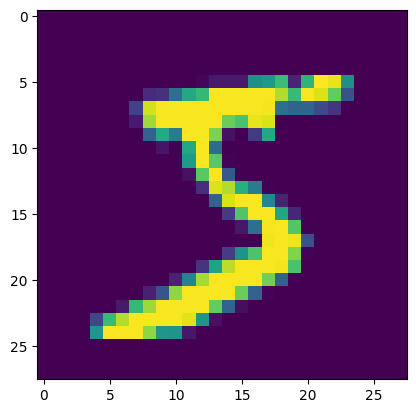

In [31]:
plt.imshow(numpy_img);

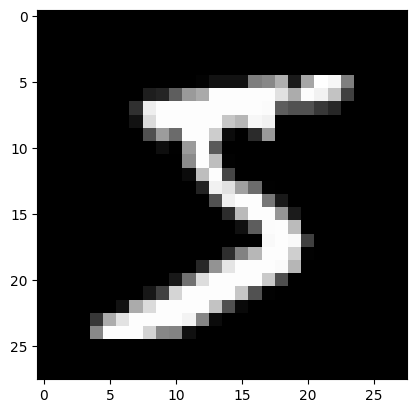

In [32]:
plt.imshow(numpy_img, cmap='gray');

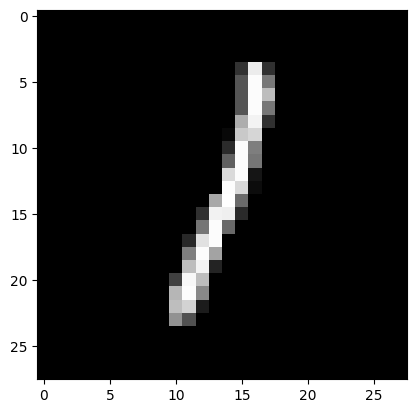

In [33]:
# случайный индекс от 0 до размера тренировочной выборки
i = np.random.randint(low=0, high=60000)
plt.imshow(trainloader.dataset.train_data[i].numpy(), cmap='gray');

In [34]:
for data in trainloader:
    print(len(data))
    print('Images:',data[0].shape)
    print('Labels:', data[1].shape)
    break

2
Images: torch.Size([4, 1, 28, 28])
Labels: torch.Size([4])


In [35]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [36]:
# Заметьте: класс наследуется от nn.Module
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)  # !!!
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 4 * 4 * 16)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [39]:
from tqdm import tqdm

In [40]:
# объявляем сеть
net = SimpleConvNet()
# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()
# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# итерируемся
for epoch in tqdm(range(3)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение завершено')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Users\adrev\AppData\Local\Temp\ipykernel_9476\2102901639.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.035
[1,  4000] loss: 0.411
[1,  6000] loss: 0.317
[1,  8000] loss: 0.244
[1, 10000] loss: 0.216
[1, 12000] loss: 0.192
[1, 14000] loss: 0.171


 33%|████████████████████████████                                                        | 1/3 [01:11<02:22, 71.14s/it]

  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.151
[2,  4000] loss: 0.131
[2,  6000] loss: 0.123
[2,  8000] loss: 0.127
[2, 10000] loss: 0.112
[2, 12000] loss: 0.103
[2, 14000] loss: 0.098


 67%|████████████████████████████████████████████████████████                            | 2/3 [02:20<01:10, 70.26s/it]

  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  2000] loss: 0.086
[3,  4000] loss: 0.094
[3,  6000] loss: 0.079
[3,  8000] loss: 0.086
[3, 10000] loss: 0.075
[3, 12000] loss: 0.076
[3, 14000] loss: 0.072


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:30<00:00, 70.12s/it]

Обучение завершено


In [41]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 98 %
Accuracy of     2 : 99 %
Accuracy of     3 : 97 %
Accuracy of     4 : 97 %
Accuracy of     5 : 96 %
Accuracy of     6 : 97 %
Accuracy of     7 : 97 %
Accuracy of     8 : 97 %
Accuracy of     9 : 98 %


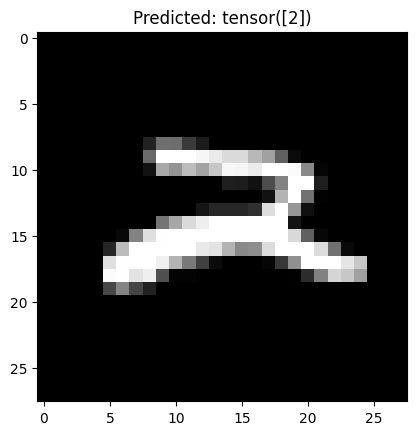

In [45]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.test_data[index].numpy()
    plt.imshow(image, cmap='gray')
    
    y_pred = net(torch.Tensor(image).view(1, 1, 28, 28))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {predicted}')

visualize_result(i)